# **Práctica 5 - Algoritmos de Búsqueda Parte 2.**

## **Nodos**

In [2]:
import random
import matplotlib.pyplot as plt

class Node:
    def __init__(self, strName, strValue, strNode):
        self.name = strName
        self.value = strValue
        self.next = strNode

    def __repr__(self):
        return f"{self.name} -> {self.value}"

def new_arr(type, size, start):
    nombres = ["alejandro","maria","jose","lucia","carlos","ana","miguel","laura","javier","paula","andres","sofia","david","elena","fernando","isabel","diego","patricia","sergio","claudia","raul","beatriz","manuel","teresa","antonio","marta","pedro","natalia","francisco","rocio","ricardo","veronica","alberto","lorena","eduardo","gabriela","roberto","daniela","hugo","carmen","ivan","julia","adrian","cristina","mario","susana","oscar","alejandra","enrique","valeria"]
    arr = []
    i = 0
    while i < size:
        if type == "ordened": value = start + i
        if type == "reverse": value = start - i
        if type == "only": value = start
        if type == "random": value = random.randint(start, start + size)
        if type == "string": value = nombres[random.randint(0, len(nombres) - 1)]
        i += 1
        arr.append(Node("Nodo " + str(i), value, None))
    return arr

## **Función Hash**

In [3]:
def hashMod(key, size):                                     # Temporal        # Espacial
    time = 1
    space = 1
    if isinstance(key, str):                                # 4               # 1
        return sum(map(ord, key)) % size, time, space       # 9
    else:                                                   # 1
        return int(key) % size, time, space                 # 5
                                                            # 19              # 1 <--- Polinomio de Función

## **Algoritmos para Tratar Colisiones**

### **Reasignación Lineal**

In [4]:
def insert_rea(table, node):                                        # Temporal      # Espacial
    collisions = 0                                                  # 3             # 2
    time = 0
    space = 0
    i, time_hash, space_hash = hashMod(node.value, len(table))      # 7+(19)        # 2+(1)
    time += time_hash
    space += space_hash
    st_pos = i                                                      # 3             # 2
    if table[i] is not None:                                        # 5             # 2 <-- no en el mejor
        collisions = 1                                              # 3             # 2
    while table[i] is not None:                                     # 5n            # 1 <--- En el mejor caso no se ejecuta, en el peor sí, n veces
        time += 1
        i = (i + 1) % len(table)                                    # 8n            # 2
        if i == st_pos:                                             # 4n            # 2
            return collisions, time, space                          # 2
    table[i] = node                                                 # 4             # 2
    return collisions, time, space                                  # 2
#                                                                   # 17n+48        # 18 <--- Peor Caso
#                                                                   # 8n+43         # 14 <--- Caso Promedio
#                                                                   # 38            # 9 <--- Mejor Caso

def search_rea(table, key):                                         # Temporal      # Espacial
    time = 0
    space = 0

    i, time_hash, space_hash = hashMod(key, len(table))             # 6+(19)        # 2+(1)
    time += time_hash
    space += space_hash
    
    st_pos = i                                                      # 3             # 2
    space += 1
    while table[i] is not None:                                     # 5n            # 1 <--- En el mejor caso no se ejecuta, en el peor sí, n veces
        time += 1
        if table[i].value == key:                                   # 7n            # 1
            return table[i], time, space                            # 2
        i = (i + 1) % len(table)                                    # 8n            # 2
        if i == st_pos:                                             # 4n            # 1
            return None, time, space                                # 2
    return None, time, space                                        # 2
#                                                                   # 24n+34        # 10 <--- Peor Caso
#                                                                   # 12n+32        # 7 <--- Caso Promedio
#                                                                   # 30            # 5 <--- Mejor Caso

#                                                                   # Complejidad General (Search + Insert)

#                                                                   # Temporal          # Espacial
#                                                                   # 24n+34 + 17n+48   # 10 + 18
#                                                                   # 12n+32 + 8n+43    # 7 + 14
#                                                                   # 30 + 38           # 5 + 9

#                                                                   # 41n+82            # 28
#                                                                   # 36n+75            # 21
#                                                                   # 68                # 14

#### **Prueba Reasignación Lineal**

In [5]:
MAX = 10
table = [None] * MAX
arr = new_arr("string", len(table), 0) # tipo de arreglo, tamaño, inicio


i = 0 # - - - - - - - - - - Insertion - - - - - - - - - -
collisions = 0
time_insert = 0
space_insert = 0
while i < len(table):
    collision, time, space = insert_rea(table, arr[i])
    collisions += collision
    time_insert += time
    space_insert += space
    i += 1
    
key = "alejandro" # - - - - - - - - - - Search - - - - - - - - - -
result, time_search, space_search = search_rea(table, key)
if result is not None: print("El valor", key, "se encontro en el", result.name)
else: print("El valor", key, "no se encontro")
print("Hubo", collisions, "colisiones")

El valor alejandro no se encontro
Hubo 8 colisiones


#### **Mejor Caso (Función Hash c/Reasignación Lineal)**

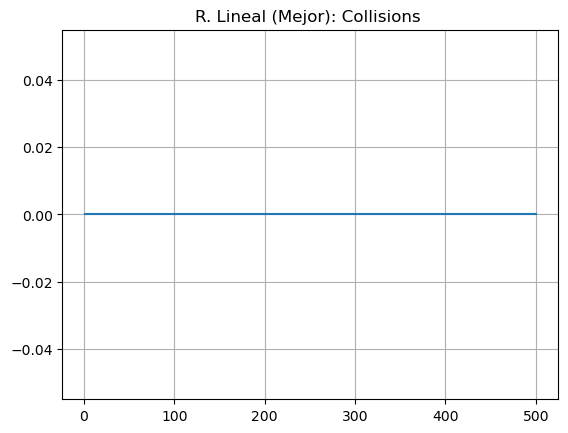

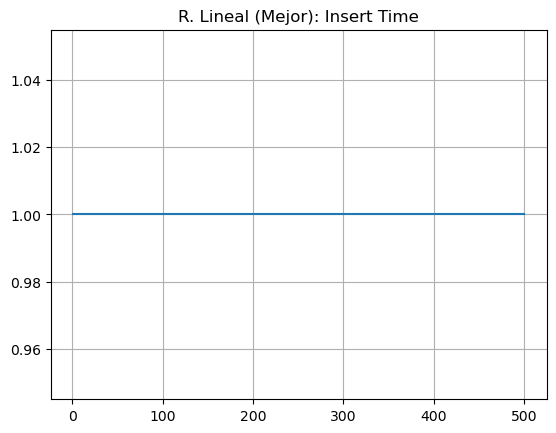

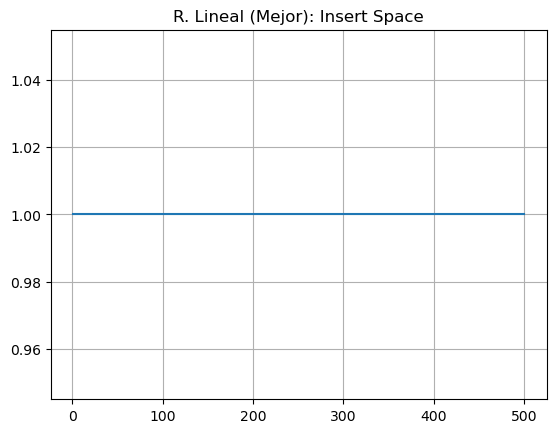

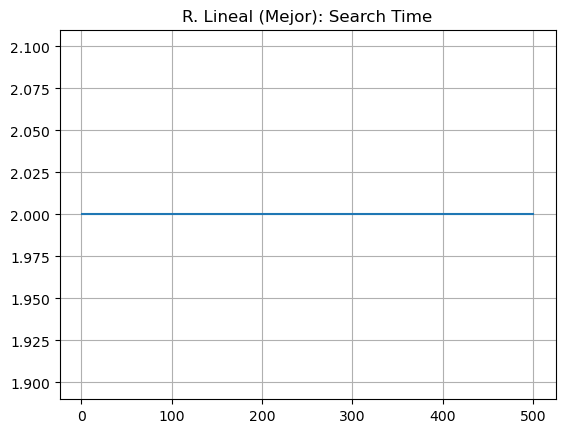

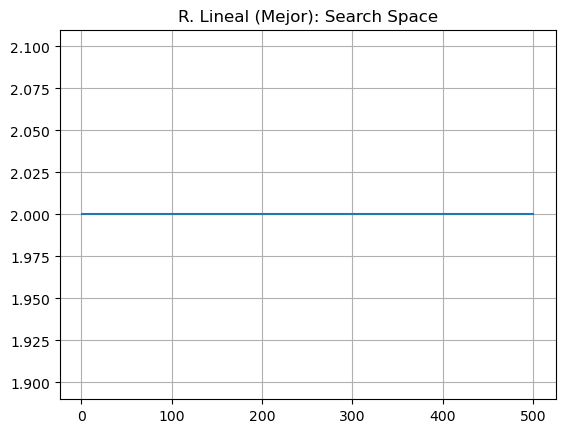

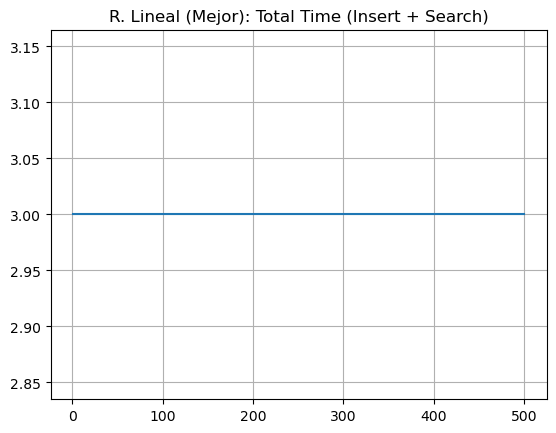

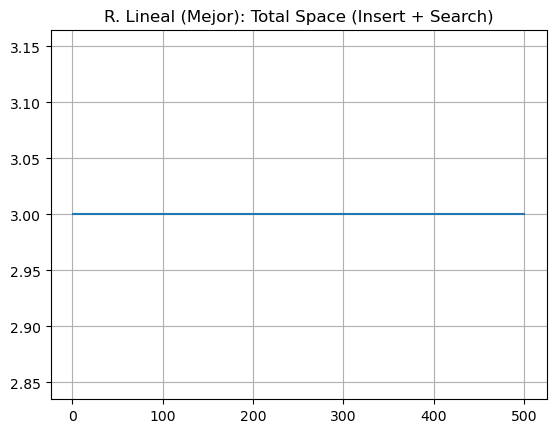

In [6]:
MAX = 500
arr = new_arr("ordened", MAX, 0) # tipo de arreglo, tamaño, inicio
aux = []

x = []

y = []
y_collisions = []
y_time = []
y_space = []
y_time_insert = []
y_space_insert = []
y_time_search = []
y_space_search = []

for j in range (len(arr)):
    aux.append(arr[j])
    table = [None] * len(aux)
    
    i = 0 # - - - - - - - - - - Insertion - - - - - - - - - -
    collisions = 0
    time_insert = 0
    space_insert = 0
    while i < len(aux):
        collision, time, space = insert_rea(table, aux[i])
        collisions += collision
        time_insert = time
        space_insert = space
        i += 1

    key = arr[len(aux) - 1].value # - - - - - - - - - - Search - - - - - - - - - -
    result, time_search, space_search = search_rea(table, key)

    x.append(len(aux))

    y_collisions.append(collisions)

    y_time_insert.append(time_insert)
    y_space_insert.append(space_insert)
    
    y_time_search.append(time_search)
    y_space_search.append(space_search)
    
    y_time.append(time_insert + time_search)
    y_space.append(space_insert + space_search)

casos = [   {"titulo": "R. Lineal (Mejor): Collisions ", "datos_y": y_collisions},
            {"titulo": "R. Lineal (Mejor): Insert Time", "datos_y": y_time_insert},
            {"titulo": "R. Lineal (Mejor): Insert Space", "datos_y": y_space_insert},
            {"titulo": "R. Lineal (Mejor): Search Time", "datos_y": y_time_search},
            {"titulo": "R. Lineal (Mejor): Search Space", "datos_y": y_space_search},
            {"titulo": "R. Lineal (Mejor): Total Time (Insert + Search)", "datos_y": y_time},
            {"titulo": "R. Lineal (Mejor): Total Space (Insert + Search)", "datos_y": y_space}  ]

for caso in casos:
    plt.title(caso["titulo"])
    plt.plot(x, caso["datos_y"])
    plt.grid(True)
    plt.show()
    
y_coll_mejor = y_collisions
y_time_in_mejor = y_time_insert
y_space_in_mejor = y_space_insert
y_time_se_mejor = y_time_search
y_space_se_mejor = y_space_search
y_time_mejor = y_time
y_space_mejor = y_space

#### **Peor Caso (Función Hash c/Reasignación Lineal)**

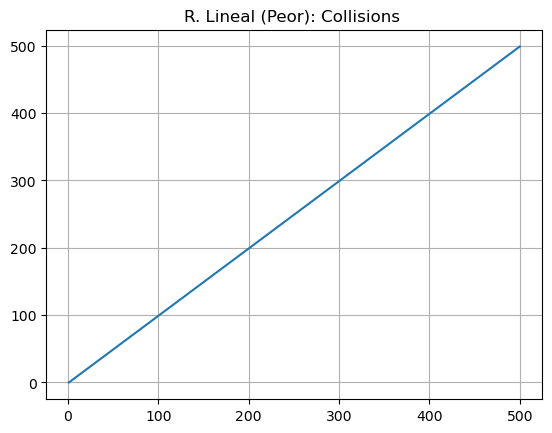

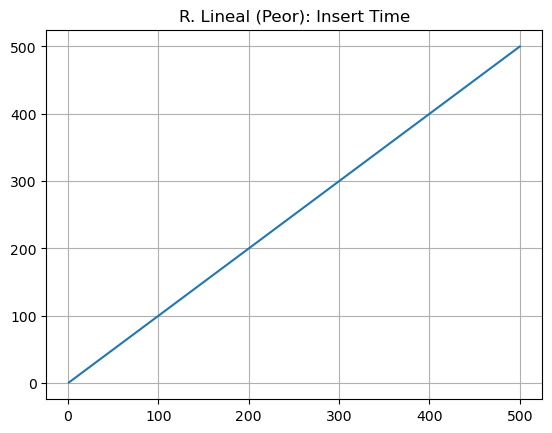

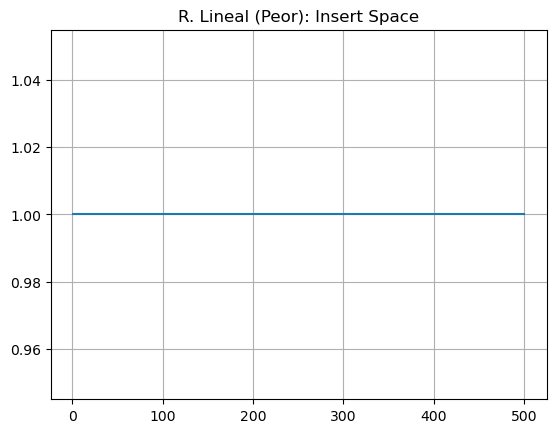

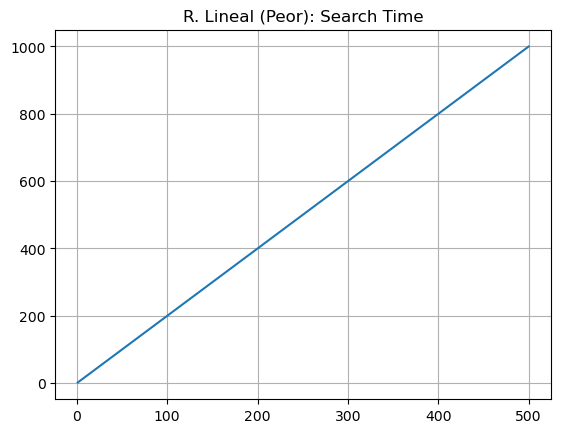

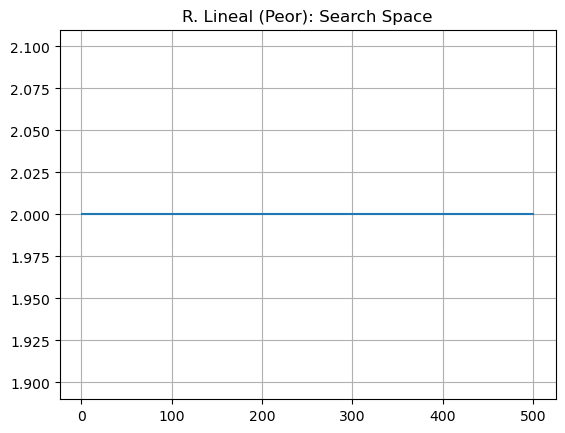

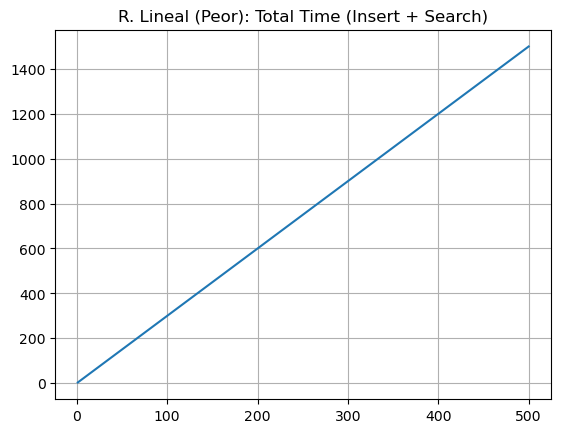

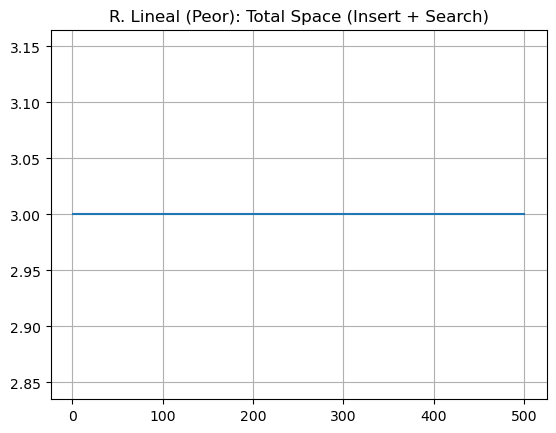

In [7]:
MAX = 500
arr = new_arr("only", MAX, 0) # tipo de arreglo, tamaño, inicio
aux = []

x = []

y = []
y_collisions = []
y_time = []
y_space = []
y_time_insert = []
y_space_insert = []
y_time_search = []
y_space_search = []
time_search = 0

for j in range (len(arr)):
    aux.append(arr[j])
    x.append(len(aux))
    table = [None] * len(aux)
    
    i = 0 # - - - - - - - - - - Insertion - - - - - - - - - -
    collisions = 0
    time_insert = 0
    space_insert = 0
    while i < len(aux):
        collision, time, space = insert_rea(table, aux[i])
        collisions += collision
        time_insert = time
        space_insert = space
        i += 1

    key = arr[len(aux) - 1].value # - - - - - - - - - - Search - - - - - - - - - -
    result, time, space_search = search_rea(table, key)
    time_search += time

    y_collisions.append(collisions)

    y_time_insert.append(time_insert)
    y_space_insert.append(space_insert)
    
    y_time_search.append(time_search)
    y_space_search.append(space_search)
    
    y_time.append(time_insert + time_search)
    y_space.append(space_insert + space_search)

casos = [   {"titulo": "R. Lineal (Peor): Collisions ", "datos_y": y_collisions},
            {"titulo": "R. Lineal (Peor): Insert Time", "datos_y": y_time_insert},
            {"titulo": "R. Lineal (Peor): Insert Space", "datos_y": y_space_insert},
            {"titulo": "R. Lineal (Peor): Search Time", "datos_y": y_time_search},
            {"titulo": "R. Lineal (Peor): Search Space", "datos_y": y_space_search},
            {"titulo": "R. Lineal (Peor): Total Time (Insert + Search)", "datos_y": y_time},
            {"titulo": "R. Lineal (Peor): Total Space (Insert + Search)", "datos_y": y_space}  ]

for caso in casos:
    plt.title(caso["titulo"])
    plt.plot(x, caso["datos_y"])
    plt.grid(True)
    plt.show()

y_coll_peor = y_collisions
y_time_in_peor = y_time_insert
y_space_in_peor = y_space_insert
y_time_se_peor = y_time_search
y_space_se_peor = y_space_search
y_time_peor = y_time
y_space_peor = y_space

#### **Caso Promedio (Función Hash c/Reasignación Lineal)**

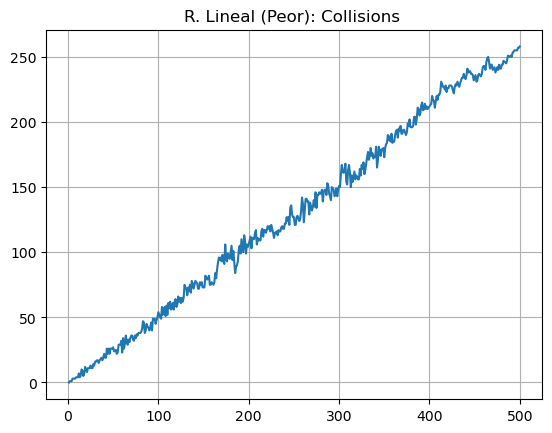

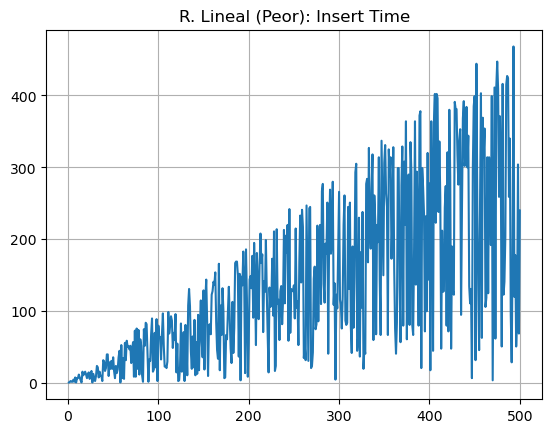

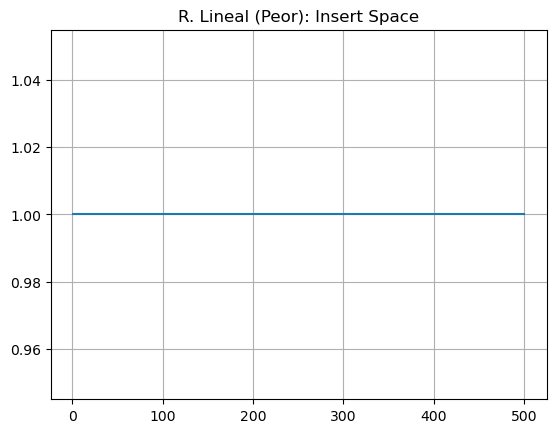

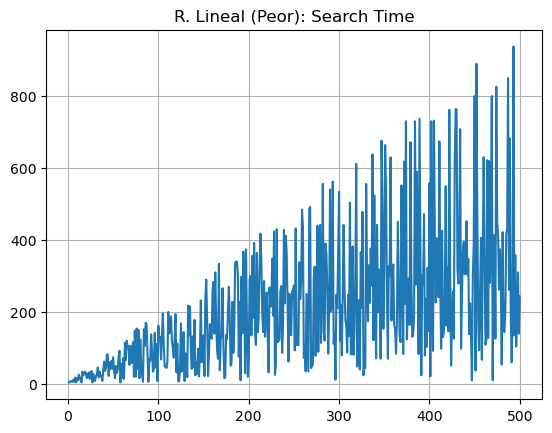

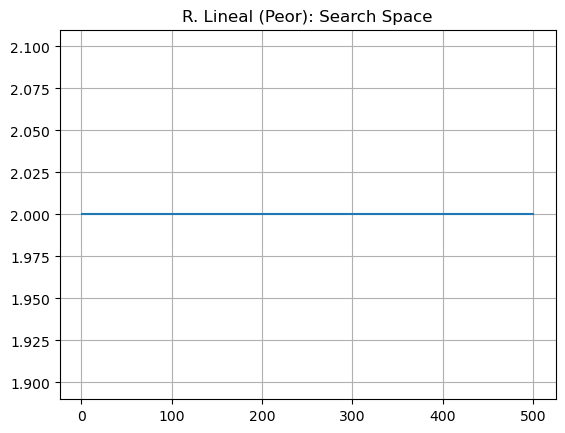

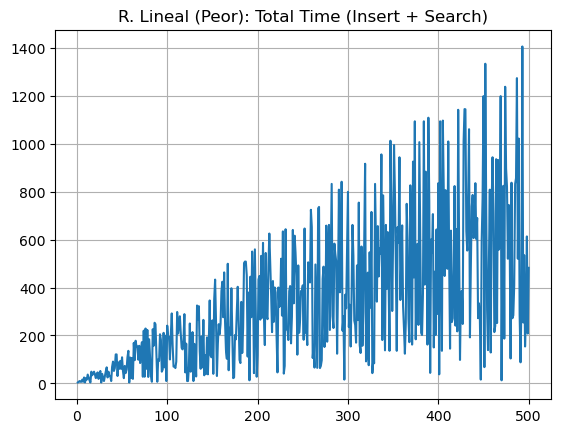

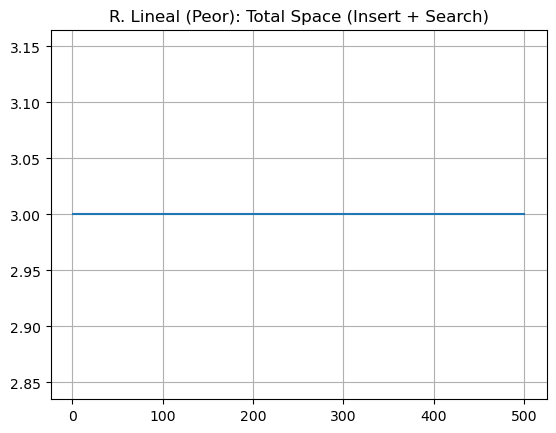

In [8]:
MAX = 500
arr = new_arr("random", MAX, 0) # tipo de arreglo, tamaño, inicio
aux = []

x = []

y = []
y_collisions = []
y_time = []
y_space = []
y_time_insert = []
y_space_insert = []
y_time_search = []
y_space_search = []
#time_search = 0

for j in range (len(arr)):
    aux.append(arr[j])
    table = [None] * len(aux)
    
    i = 0 # - - - - - - - - - - Insertion - - - - - - - - - -
    collisions = 0
    time_insert = 0
    space_insert = 0
    while i < len(aux):
        collision, time, space = insert_rea(table, aux[i])
        collisions += collision
        time_insert = time
        space_insert = space
        i += 1

    key = arr[len(aux) - 1].value # - - - - - - - - - - Search - - - - - - - - - -
    result, time_search, space_search = search_rea(table, key)
    time_search += time

    x.append(len(aux))

    y_collisions.append(collisions)

    y_time_insert.append(time_insert)
    y_space_insert.append(space_insert)
    
    y_time_search.append(time_search)
    y_space_search.append(space_search)
    
    y_time.append(time_insert + time_search)
    y_space.append(space_insert + space_search)

casos = [   {"titulo": "R. Lineal (Peor): Collisions ", "datos_y": y_collisions},
            {"titulo": "R. Lineal (Peor): Insert Time", "datos_y": y_time_insert},
            {"titulo": "R. Lineal (Peor): Insert Space", "datos_y": y_space_insert},
            {"titulo": "R. Lineal (Peor): Search Time", "datos_y": y_time_search},
            {"titulo": "R. Lineal (Peor): Search Space", "datos_y": y_space_search},
            {"titulo": "R. Lineal (Peor): Total Time (Insert + Search)", "datos_y": y_time},
            {"titulo": "R. Lineal (Peor): Total Space (Insert + Search)", "datos_y": y_space}  ]

for caso in casos:
    plt.title(caso["titulo"])
    plt.plot(x, caso["datos_y"])
    plt.grid(True)
    plt.show()

y_coll_prom = y_collisions
y_time_in_prom = y_time_insert
y_space_in_prom = y_space_insert
y_time_se_prom = y_time_search
y_space_se_prom = y_space_search
y_time_prom = y_time
y_space_prom = y_space

#### **Comparativas (Función Hash c/Reasignación Lineal)**

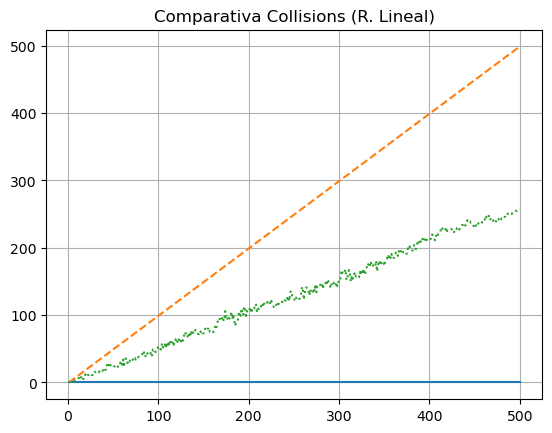

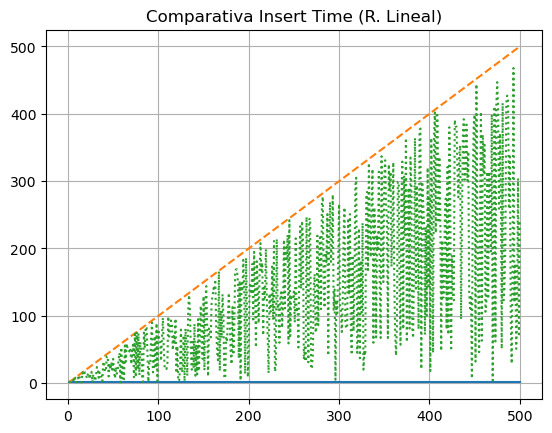

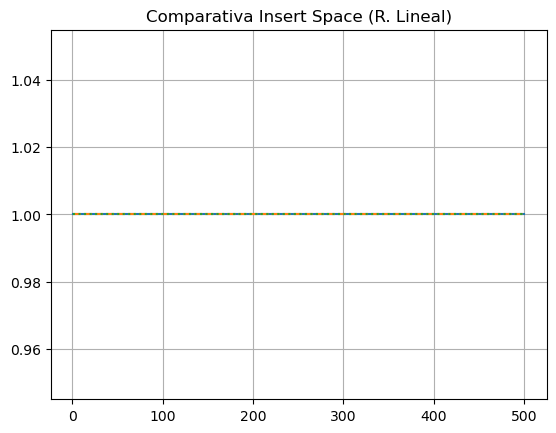

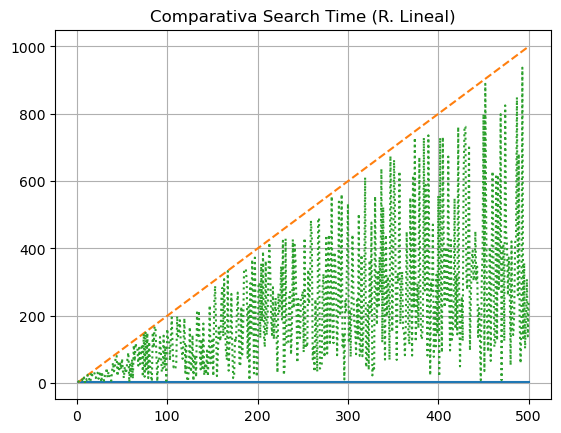

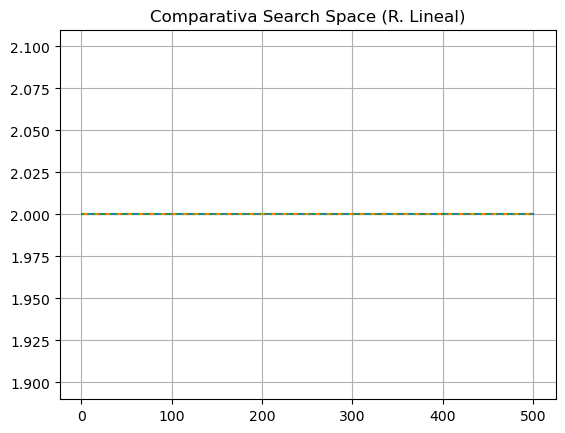

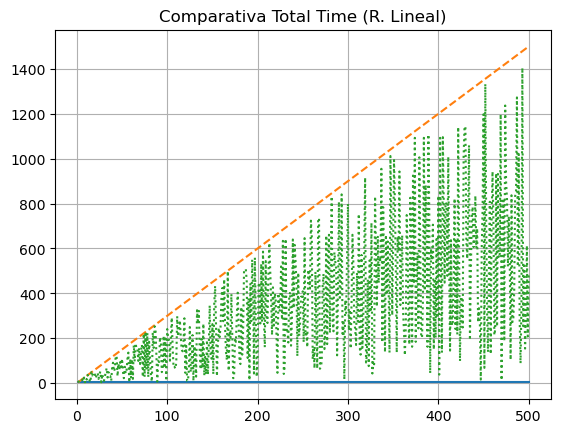

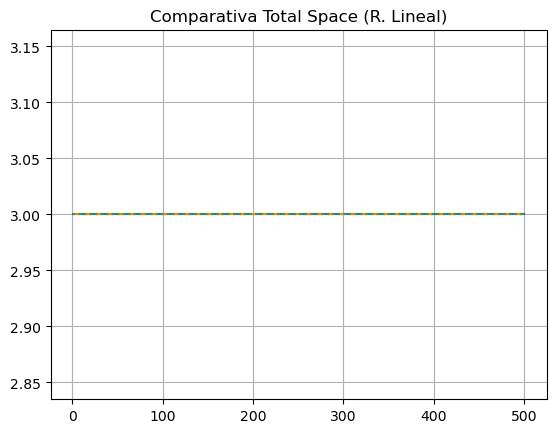

In [9]:
casos = [   {"titulo": "Comparativa Collisions (R. Lineal)", 
            "datos": [y_coll_mejor, y_coll_peor, y_coll_prom]},
            {"titulo": "Comparativa Insert Time (R. Lineal)", 
            "datos": [y_time_in_mejor, y_time_in_peor, y_time_in_prom]},
            {"titulo": "Comparativa Insert Space (R. Lineal)", 
            "datos": [y_space_in_mejor, y_space_in_peor, y_space_in_prom]},
            {"titulo": "Comparativa Search Time (R. Lineal)", 
            "datos": [y_time_se_mejor, y_time_se_peor, y_time_se_prom]},
            {"titulo": "Comparativa Search Space (R. Lineal)", 
            "datos": [y_space_se_mejor, y_space_se_peor, y_space_se_prom]},
            {"titulo": "Comparativa Total Time (R. Lineal)", 
            "datos": [y_time_mejor, y_time_peor, y_time_prom]},
            {"titulo": "Comparativa Total Space (R. Lineal)", 
            "datos": [y_space_mejor, y_space_peor, y_space_prom]},]
styles = ["-", "--",":"]

for caso in casos:
    i = 0
    plt.title(caso["titulo"])
    for values in caso["datos"]:
        plt.plot(x, values, styles[i % len(styles)])
        i += 1
    plt.grid(True)
    plt.show()

### **Arreglos Anidados**

In [10]:
def insert_arr(table, node):                                    # Temporal      # Espacial
    time = 0
    space = 0
    collisions = 0                                              # 3             # 2
    i, time_hash, space_hash = hashMod(node.value, len(table))  # 6+(19)        # 2+(1)
    time += time_hash
    space += space_hash
    time += 1
    space += 1
    if len(table[i]) > 0:                                       # 6             # 1
        collisions = 1                                          # 3             # 1
    table[i].append(node)                                       # 4             # 1
    return collisions, time, space                              # 2
#                                                               # 43            # 8 <--- Peor Caso
#                                                               # 39            # 7 <--- Caso Promedio
#                                                               # 34            # 6 <--- Mejor Caso

def search_arr(table, key):                                     # Temporal      # Espacial
    time = 0
    space = 0
    i, time_hash, space_hash = hashMod(key, len(table))         # 6+(19)        # 2+(1)
    time += time_hash
    space += space_hash
    collision_list = table[i]                                   # 4             # 2
    space += 1
    i = 0                                                       # 3             # 2
    while i < len(collision_list):                              # 5n            # 1 <--- En el mejor caso no se ejecuta, en el peor sí, n veces
        time += 1                                               # 5n            # 2
        node = collision_list[i]                                # 4n            # 2
        if node.value == key:                                   # 5n            # 1
            return node, time, space                            # 2
        i += 1                                                  # 5n            # 2
    return None, time, space                                    # 2
#                                                               # 24n+36        # 15 <--- Peor Caso
#                                                               # 12n+35        # 12 <--- Caso Promedio
#                                                               # 34            # 8 <--- Mejor Caso

#                                                               # Complejidad General (Search + Insert)

#                                                               # Temporal          # Espacial
#                                                               # 24n+36 + 43       # 15 + 8
#                                                               # 12n+35 + 39       # 12 + 7
#                                                               # 34 + 34           # 8 + 6

#                                                               # 24n+79            # 23 <--- Peor Caso
#                                                               # 12n+76            # 19 <--- Caso Promedio
#                                                               # 68                # 14 <--- Mejor Caso

#### **Prueba Arreglos Anidados**

In [11]:
MAX = 10
table = [[] for _ in range(MAX)] 
arr = new_arr("string", len(table), 0) # tipo de arreglo, tamaño, inicio

i = 0 # - - - - - - - - - - Insertion - - - - - - - - - -
collisions = 0
time_insert = 0
space_insert = 0
while i < len(table):
    collision, time, space = insert_arr(table, arr[i])
    collisions += collision
    time_insert += time
    space_insert += space
    i += 1
    
key = "100" # - - - - - - - - - - Search - - - - - - - - - -
result, time_search, space_search = search_arr(table, key)
if result is not None: print("El valor", key, "se encontro en el", result.name)
else: print("El valor", key, "no se encontro")
print("Hubo", collisions, "colisiones")

El valor 100 no se encontro
Hubo 4 colisiones


#### **Mejor Caso (Función Hash c/Arreglos Anidados)**

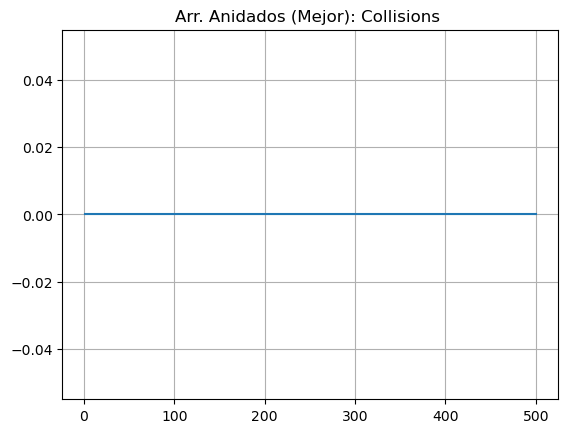

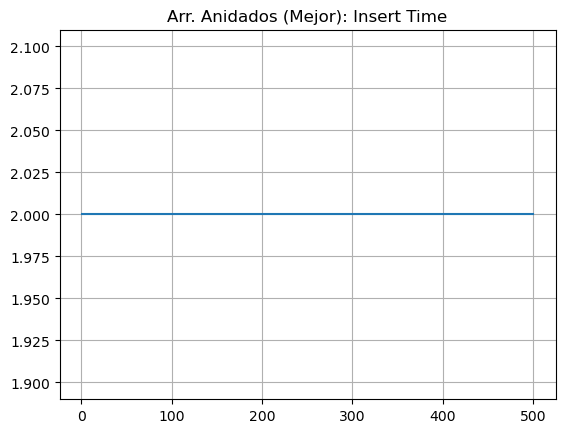

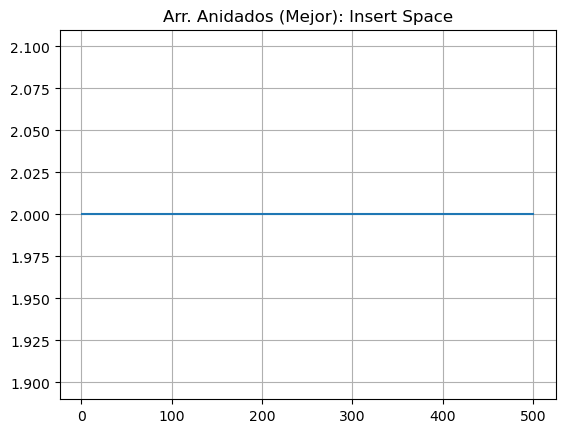

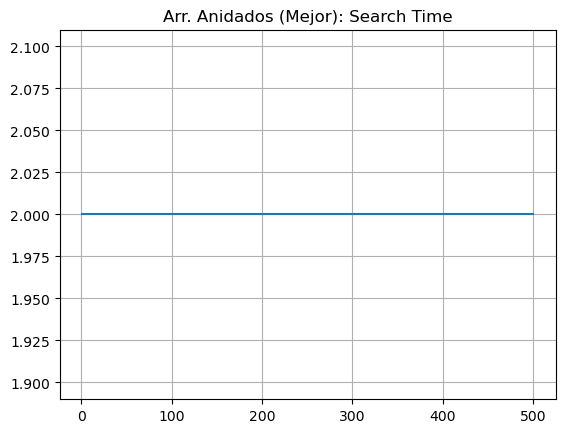

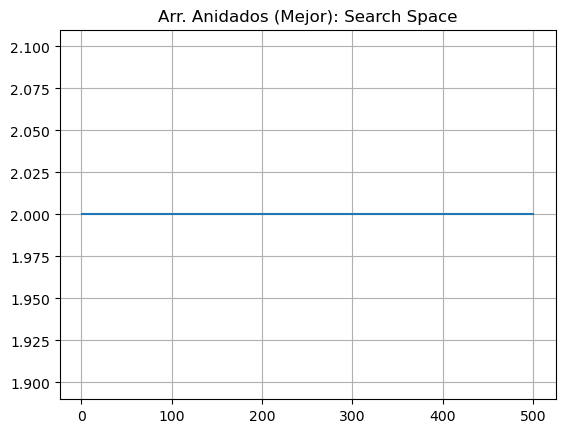

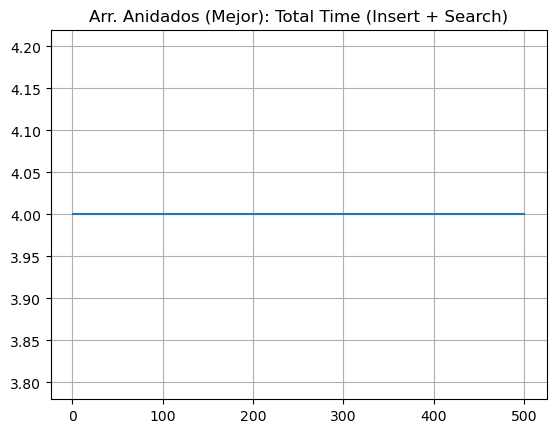

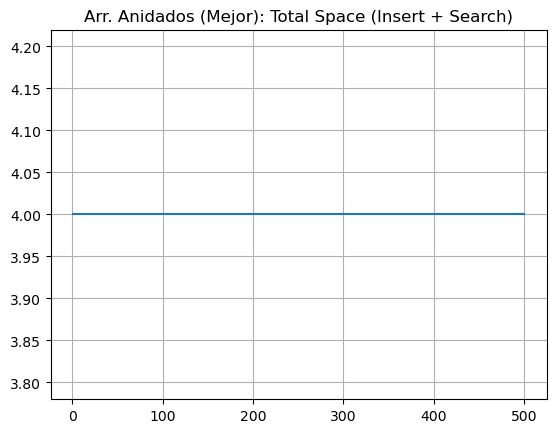

In [12]:
MAX = 500
arr = new_arr("ordened", MAX, 0) # tipo de arreglo, tamaño, inicio
aux = []

x = []

y = []
y_collisions = []
y_time = []
y_space = []
y_time_insert = []
y_space_insert = []
y_time_search = []
y_space_search = []

for j in range (len(arr)):
    aux.append(arr[j])
    table = [[] for _ in range(len(aux))]
    
    i = 0 # - - - - - - - - - - Insertion - - - - - - - - - -
    collisions = 0
    time_insert = 0
    space_insert = 0
    while i < len(aux):
        collision, time, space = insert_arr(table, aux[i])
        collisions += collision
        time_insert = time
        space_insert = space
        i += 1

    key = arr[len(aux) - 1].value # - - - - - - - - - - Search - - - - - - - - - -
    result, time_search, space_search = search_arr(table, key)

    x.append(len(aux))

    y_collisions.append(collisions)

    y_time_insert.append(time_insert)
    y_space_insert.append(space_insert)
    
    y_time_search.append(time_search)
    y_space_search.append(space_search)
    
    y_time.append(time_insert + time_search)
    y_space.append(space_insert + space_search)

casos = [   {"titulo": "Arr. Anidados (Mejor): Collisions ", "datos_y": y_collisions},
            {"titulo": "Arr. Anidados (Mejor): Insert Time", "datos_y": y_time_insert},
            {"titulo": "Arr. Anidados (Mejor): Insert Space", "datos_y": y_space_insert},
            {"titulo": "Arr. Anidados (Mejor): Search Time", "datos_y": y_time_search},
            {"titulo": "Arr. Anidados (Mejor): Search Space", "datos_y": y_space_search},
            {"titulo": "Arr. Anidados (Mejor): Total Time (Insert + Search)", "datos_y": y_time},
            {"titulo": "Arr. Anidados (Mejor): Total Space (Insert + Search)", "datos_y": y_space}  ]

for caso in casos:
    plt.title(caso["titulo"])
    plt.plot(x, caso["datos_y"])
    plt.grid(True)
    plt.show()
    
y_coll_mejor = y_collisions
y_time_in_mejor = y_time_insert
y_space_in_mejor = y_space_insert
y_time_se_mejor = y_time_search
y_space_se_mejor = y_space_search
y_time_mejor = y_time
y_space_mejor = y_space

#### **Peor Caso (Función Hash c/Arreglos Anidados)**

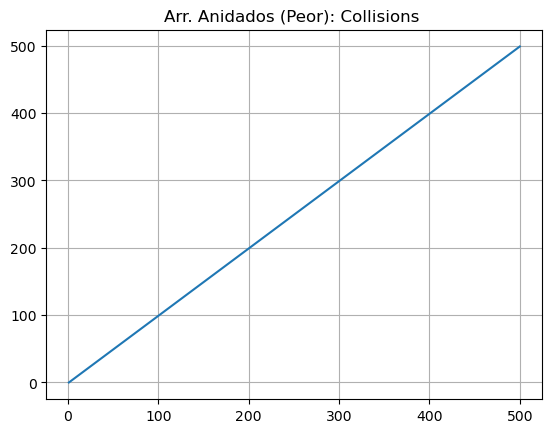

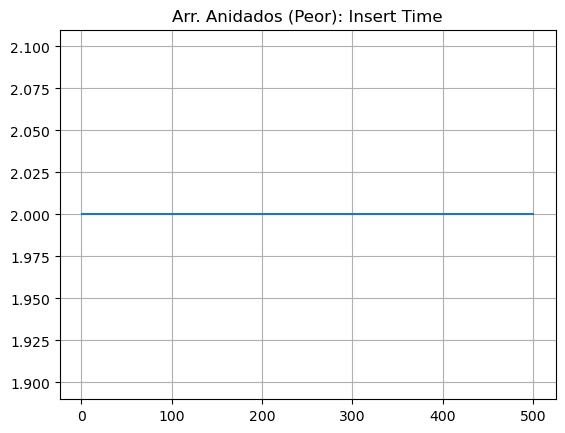

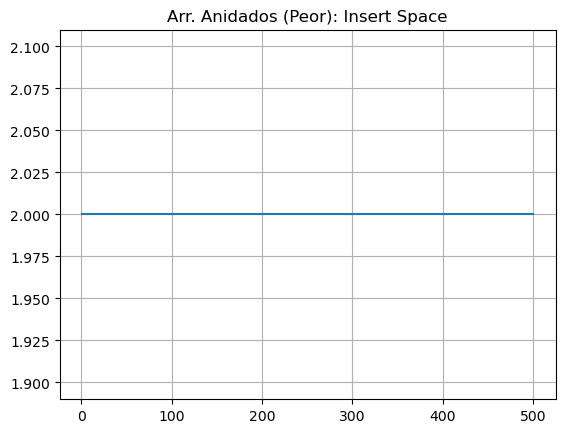

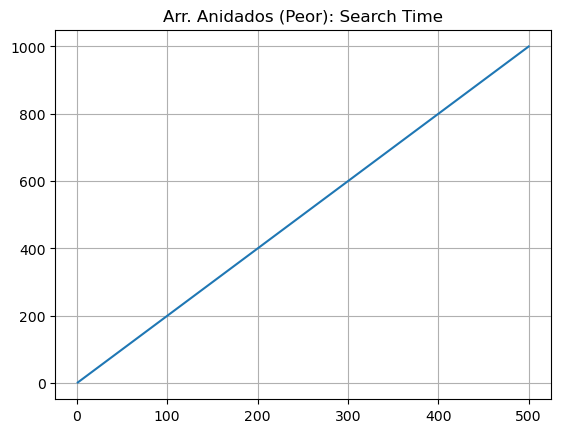

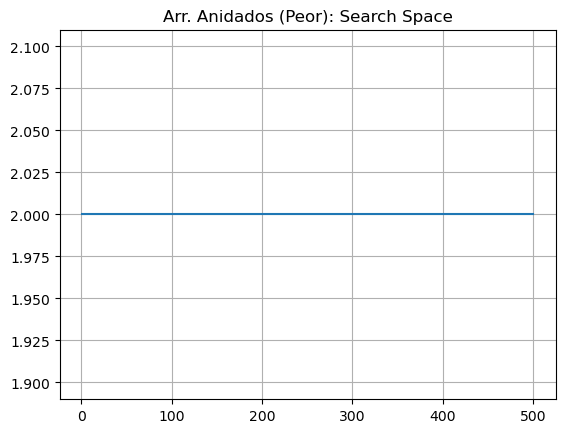

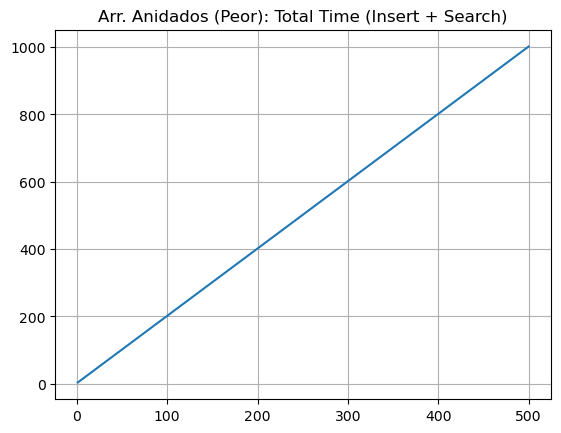

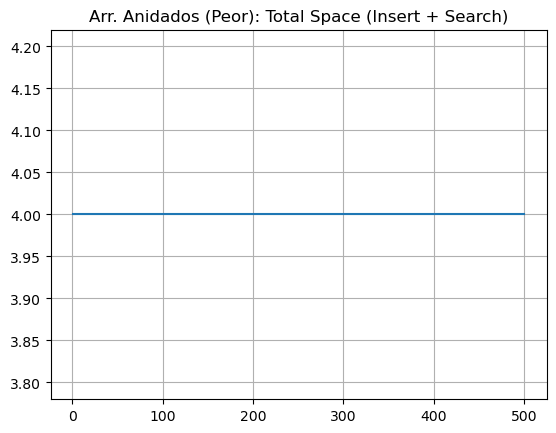

In [13]:
MAX = 500
arr = new_arr("only", MAX, 0) # tipo de arreglo, tamaño, inicio
aux = []

x = []

y = []
y_collisions = []
y_time = []
y_space = []
y_time_insert = []
y_space_insert = []
y_time_search = []
y_space_search = []
time_search = 0

for j in range (len(arr)):
    aux.append(arr[j])
    table = [[] for _ in range(len(aux))]
    
    i = 0 # - - - - - - - - - - Insertion - - - - - - - - - -
    collisions = 0
    time_insert = 0
    space_insert = 0
    while i < len(aux):
        collision, time, space = insert_arr(table, aux[i])
        collisions += collision
        time_insert = time
        space_insert = space
        i += 1

    key = arr[len(aux) - 1].value # - - - - - - - - - - Search - - - - - - - - - -
    result, time, space_search = search_arr(table, key)
    time_search += time

    x.append(len(aux))

    y_collisions.append(collisions)

    y_time_insert.append(time_insert)
    y_space_insert.append(space_insert)
    
    y_time_search.append(time_search)
    y_space_search.append(space_search)
    
    y_time.append(time_insert + time_search)
    y_space.append(space_insert + space_search)

casos = [   {"titulo": "Arr. Anidados (Peor): Collisions ", "datos_y": y_collisions},
            {"titulo": "Arr. Anidados (Peor): Insert Time", "datos_y": y_time_insert},
            {"titulo": "Arr. Anidados (Peor): Insert Space", "datos_y": y_space_insert},
            {"titulo": "Arr. Anidados (Peor): Search Time", "datos_y": y_time_search},
            {"titulo": "Arr. Anidados (Peor): Search Space", "datos_y": y_space_search},
            {"titulo": "Arr. Anidados (Peor): Total Time (Insert + Search)", "datos_y": y_time},
            {"titulo": "Arr. Anidados (Peor): Total Space (Insert + Search)", "datos_y": y_space}  ]

for caso in casos:
    plt.title(caso["titulo"])
    plt.plot(x, caso["datos_y"])
    plt.grid(True)
    plt.show()

y_coll_peor = y_collisions
y_time_in_peor = y_time_insert
y_space_in_peor = y_space_insert
y_time_se_peor = y_time_search
y_space_se_peor = y_space_search
y_time_peor = y_time
y_space_peor = y_space

#### **Caso Promedio (Función Hash c/Arreglos Anidados)**

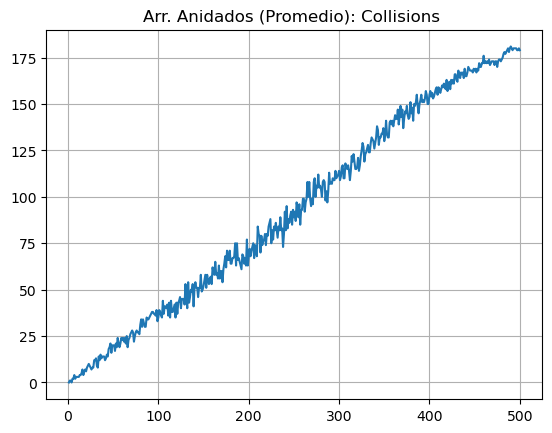

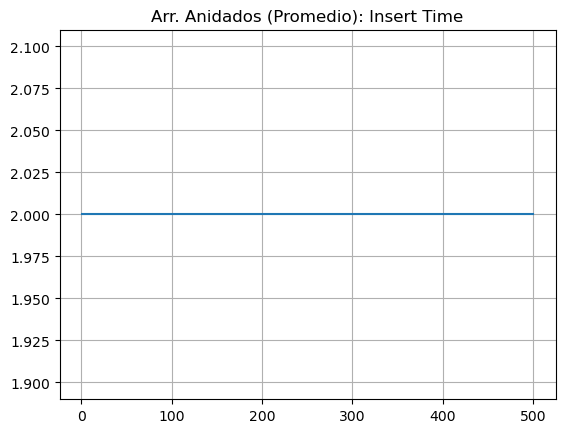

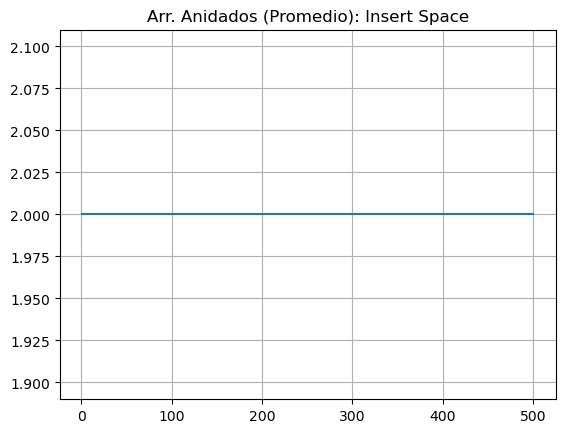

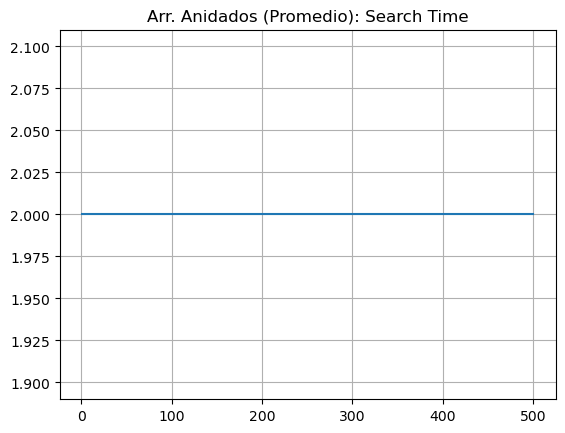

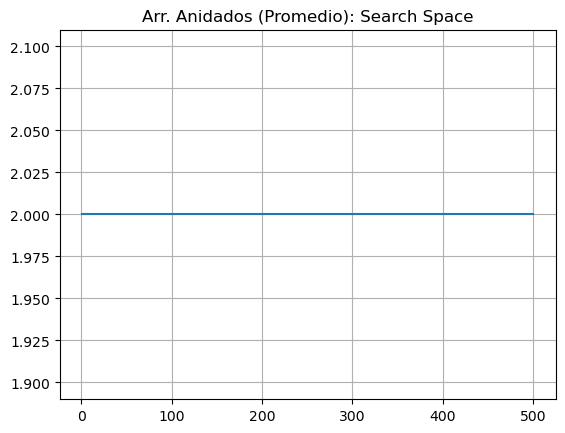

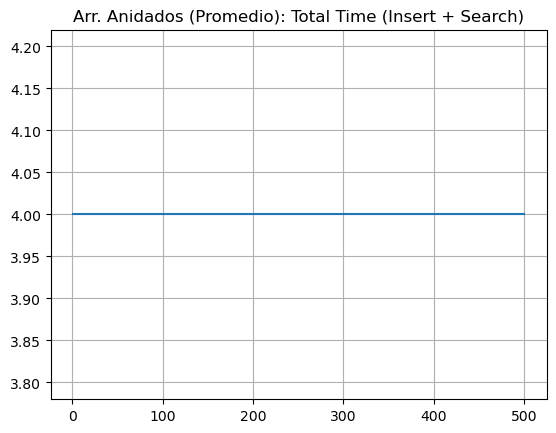

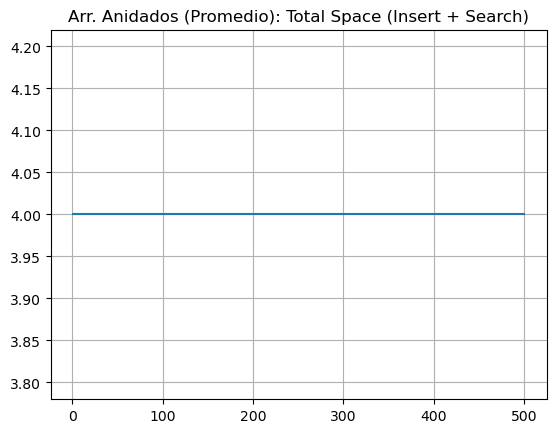

In [14]:
MAX = 500
arr = new_arr("random", MAX, 0) # tipo de arreglo, tamaño, inicio
aux = []

x = []

y = []
y_collisions = []
y_time = []
y_space = []
y_time_insert = []
y_space_insert = []
y_time_search = []
y_space_search = []

for j in range (len(arr)):
    aux.append(arr[j])
    table = [[] for _ in range(len(aux))]
    
    i = 0 # - - - - - - - - - - Insertion - - - - - - - - - -
    collisions = 0
    time_insert = 0
    space_insert = 0
    while i < len(aux):
        collision, time, space = insert_arr(table, aux[i])
        collisions += collision
        time_insert = time
        space_insert = space
        i += 1

    key = arr[len(aux) - 1].value # - - - - - - - - - - Search - - - - - - - - - -
    result, time_search, space_search = search_arr(table, key)

    x.append(len(aux))

    y_collisions.append(collisions)

    time_search = 2
    y_time_insert.append(time_insert)
    y_space_insert.append(space_insert)
    
    y_time_search.append(time_search)
    y_space_search.append(space_search)
    
    y_time.append(time_insert + time_search)
    y_space.append(space_insert + space_search)

casos = [   {"titulo": "Arr. Anidados (Promedio): Collisions ", "datos_y": y_collisions},
            {"titulo": "Arr. Anidados (Promedio): Insert Time", "datos_y": y_time_insert},
            {"titulo": "Arr. Anidados (Promedio): Insert Space", "datos_y": y_space_insert},
            {"titulo": "Arr. Anidados (Promedio): Search Time", "datos_y": y_time_search},
            {"titulo": "Arr. Anidados (Promedio): Search Space", "datos_y": y_space_search},
            {"titulo": "Arr. Anidados (Promedio): Total Time (Insert + Search)", "datos_y": y_time},
            {"titulo": "Arr. Anidados (Promedio): Total Space (Insert + Search)", "datos_y": y_space}  ]

for caso in casos:
    plt.title(caso["titulo"])
    plt.plot(x, caso["datos_y"])
    plt.grid(True)
    plt.show()

y_coll_prom = y_collisions
y_time_in_prom = y_time_insert
y_space_in_prom = y_space_insert
y_time_se_prom = y_time_search
y_space_se_prom = y_space_search
y_time_prom = y_time
y_space_prom = y_space

#### **Comparativas (Función Hash c/Arreglos Anidados)**

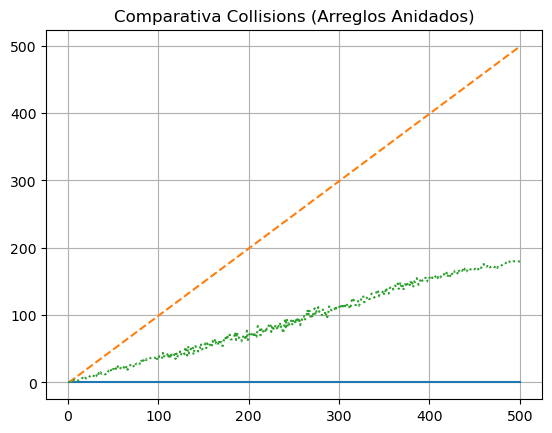

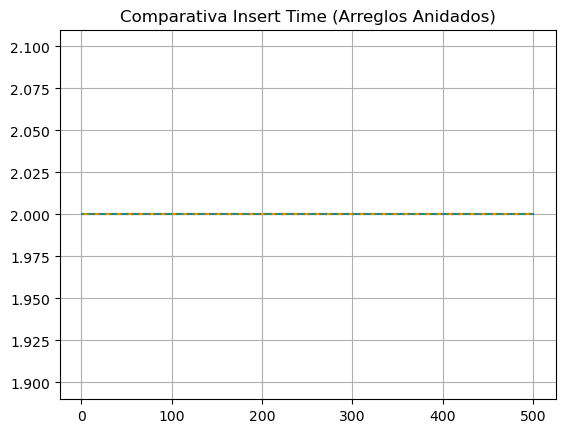

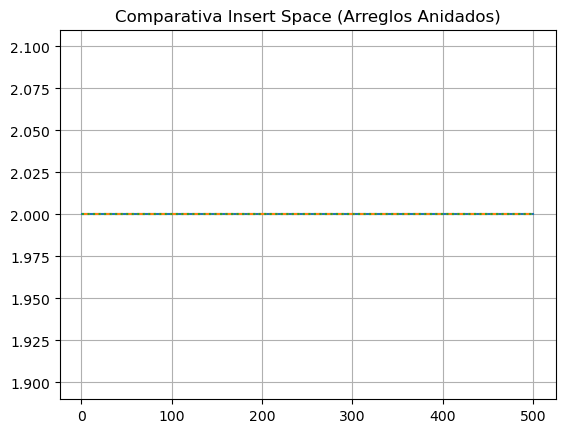

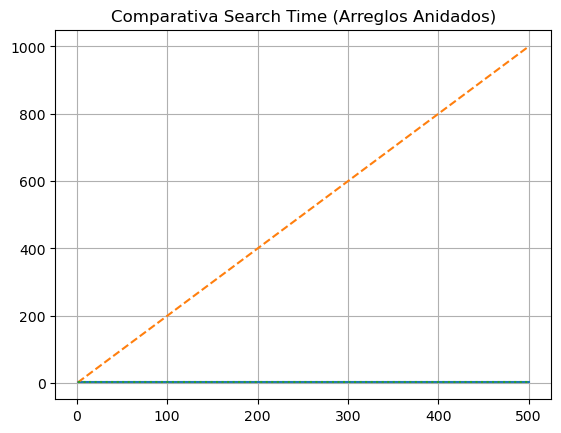

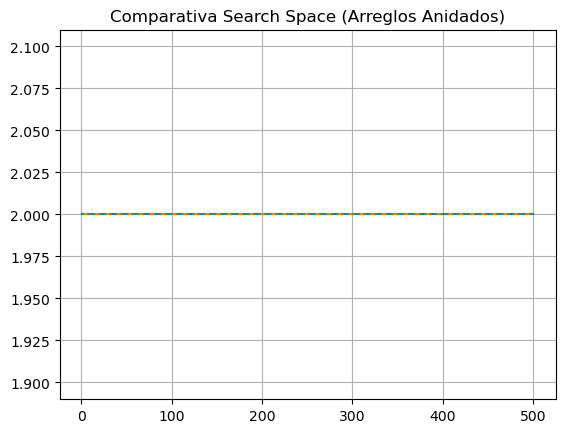

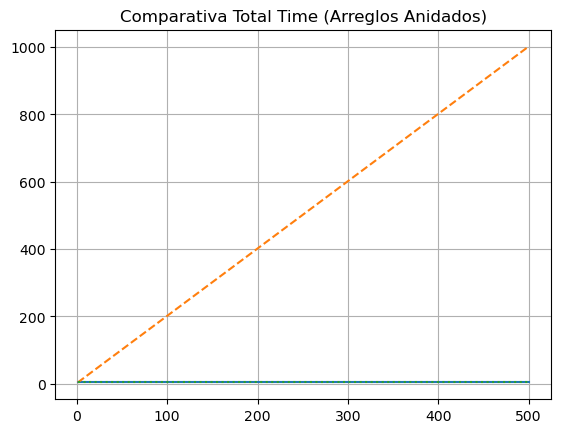

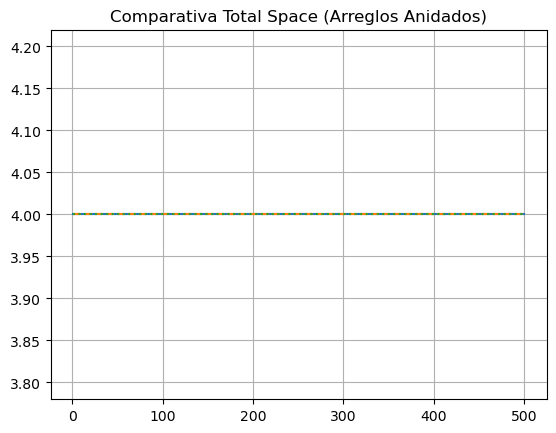

In [15]:
casos = [   {"titulo": "Comparativa Collisions (Arreglos Anidados)", 
            "datos": [y_coll_mejor, y_coll_peor, y_coll_prom]},
            {"titulo": "Comparativa Insert Time (Arreglos Anidados)", 
            "datos": [y_time_in_mejor, y_time_in_peor, y_time_in_prom]},
            {"titulo": "Comparativa Insert Space (Arreglos Anidados)", 
            "datos": [y_space_in_mejor, y_space_in_peor, y_space_in_prom]},
            {"titulo": "Comparativa Search Time (Arreglos Anidados)", 
            "datos": [y_time_se_mejor, y_time_se_peor, y_time_se_prom]},
            {"titulo": "Comparativa Search Space (Arreglos Anidados)", 
            "datos": [y_space_se_mejor, y_space_se_peor, y_space_se_prom]},
            {"titulo": "Comparativa Total Time (Arreglos Anidados)", 
            "datos": [y_time_mejor, y_time_peor, y_time_prom]},
            {"titulo": "Comparativa Total Space (Arreglos Anidados)", 
            "datos": [y_space_mejor, y_space_peor, y_space_prom]},]
styles = ["-", "--",":"]

for caso in casos:
    i = 0
    plt.title(caso["titulo"])
    for values in caso["datos"]:
        plt.plot(x, values, styles[i % len(styles)])
        i += 1
    plt.grid(True)
    plt.show()